In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [42]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [43]:
#Cleaning the data frame
df = df[["Country","EdLevel","YearsCodePro","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [44]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [46]:
df["YearsCodePro"].unique()

array([nan, '4', '5', '6', '2', '30', '18', '21', '16', '10',
       'Less than 1 year', '15', '3', '1', '12', '8', '7', '17', '14',
       '26', '25', '34', '11', '24', '22', '13', '9', '20', '31', '23',
       '39', '27', '35', '19', '33', 'More than 50 years', '28', '37',
       '43', '40', '29', '38', '32', '45', '42', '46', '36', '44', '47',
       '41', '50', '49', '48'], dtype=object)

In [47]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return x
df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)
df["YearsCodePro"].unique()

array([nan, '4', '5', '6', '2', '30', '18', '21', '16', '10', 0.5, '15',
       '3', '1', '12', '8', '7', '17', '14', '26', '25', '34', '11', '24',
       '22', '13', '9', '20', '31', '23', '39', '27', '35', '19', '33',
       50, '28', '37', '43', '40', '29', '38', '32', '45', '42', '46',
       '36', '44', '47', '41', '50', '49', '48'], dtype=object)

In [48]:
df["YearsCodePro"]=pd.to_numeric(df["YearsCodePro"],errors='coerce')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  float64
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


In [50]:
mean_value=df["YearsCodePro"].mean()
mean_value

9.025823974477808

In [51]:
df["YearsCodePro"].fillna(value=mean_value,inplace=True)

In [52]:
df.isna().sum()

Country          0
EdLevel         21
YearsCodePro     0
Employment      13
Salary           0
dtype: int64

In [53]:
# df["EdLevel"].fillna(method="ffill",inplace=True)
# df["Employment"].fillna(method="ffill",inplace=True)

In [54]:
df.isna().sum()

Country          0
EdLevel         21
YearsCodePro     0
Employment      13
Salary           0
dtype: int64

In [55]:
#We can also use below command to remove all rows that contain null values but that comes under radical approach
df=df.dropna()

In [56]:
df = df[df["Employment"]=="Employed full-time"]
df = df.drop("Employment",axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40608 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40608 non-null  object 
 1   EdLevel       40608 non-null  object 
 2   YearsCodePro  40608 non-null  float64
 3   Salary        40608 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


In [57]:
df.isna().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [58]:
df["Country"].value_counts()

United States of America                                9230
India                                                   3464
Germany                                                 2777
United Kingdom of Great Britain and Northern Ireland    2614
Canada                                                  1560
                                                        ... 
Guinea                                                     1
Dominica                                                   1
Saint Kitts and Nevis                                      1
Monaco                                                     1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [59]:
#We have to get rid of countries where we have few values
def shorten_categories(categories,cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map        

In [60]:
country_map = shorten_categories(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   10852
United States of America                                 9230
India                                                    3464
Germany                                                  2777
United Kingdom of Great Britain and Northern Ireland     2614
Canada                                                   1560
France                                                   1408
Brazil                                                   1351
Spain                                                     897
Netherlands                                               841
Australia                                                 827
Poland                                                    781
Italy                                                     770
Russian Federation                                        747
Sweden                                                    743
Turkey                                                    471
Switzerl

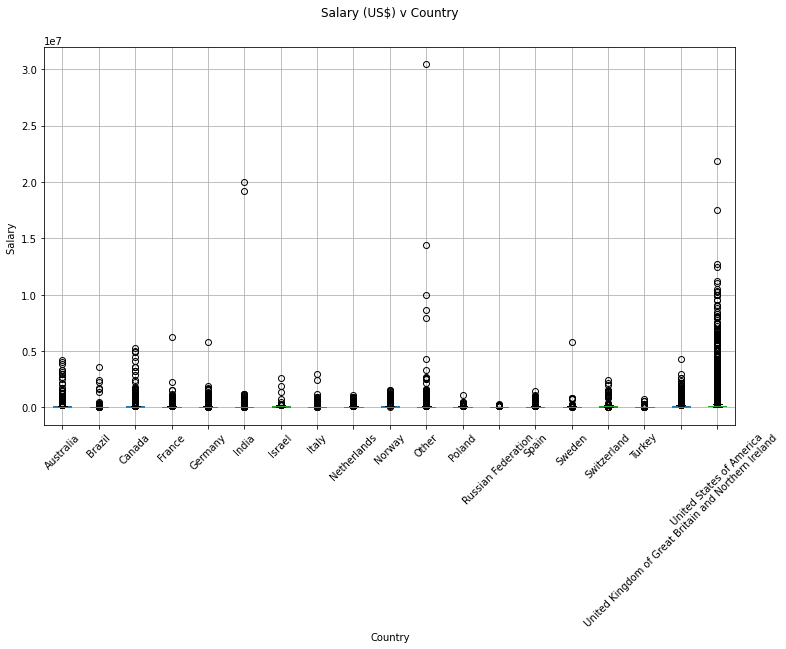

In [61]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary ')
plt.xticks(rotation=45 )
plt.show()

In [62]:
df = df[df["Salary"]<=250000]
df = df[df["Salary"]>=10000]
df = df[df["Country"] != 'Other']

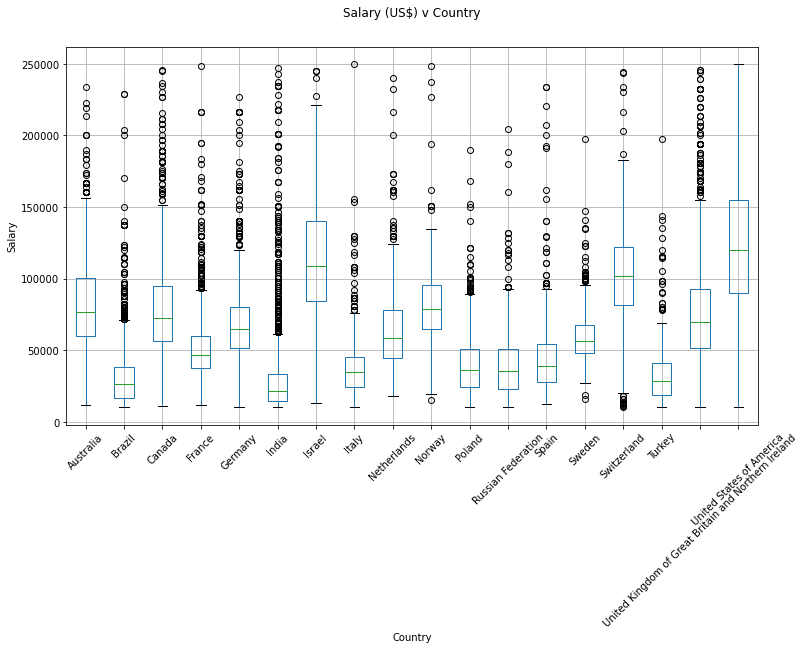

In [63]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title(' ')
plt.ylabel('Salary')
plt.xticks(rotation = 45)
plt.show()

In [64]:
df["YearsCodePro"].unique()

array([ 4.        ,  5.        ,  6.        ,  2.        , 18.        ,
       21.        , 16.        , 10.        ,  0.5       ,  3.        ,
       15.        , 12.        ,  8.        ,  9.02582397, 17.        ,
        1.        , 14.        , 26.        , 34.        , 11.        ,
       25.        , 24.        , 22.        , 13.        ,  9.        ,
        7.        , 39.        , 20.        , 27.        , 23.        ,
       30.        , 19.        , 35.        , 33.        , 37.        ,
       43.        , 40.        , 29.        , 38.        , 31.        ,
       42.        , 28.        , 46.        , 32.        , 36.        ,
       47.        , 45.        , 44.        , 41.        , 50.        ,
       49.        , 48.        ])

In [65]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else',
       'Primary/elementary school',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [66]:
def assemb_ling(x):
    if "Master’s degree" in x:
        return "Masters Degree"
    if "Bachelor’s degree" in x:
        return "Bachelors Degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Professional degree"
    return "Less than a bachelor degree"

df["EdLevel"]=df["EdLevel"].apply(assemb_ling)

In [67]:
df["EdLevel"].unique()

array(['Masters Degree', 'Bachelors Degree', 'Professional degree',
       'Less than a bachelor degree'], dtype=object)

In [68]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([2, 0, 3, 1])

In [69]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  0,  5,
        9])

In [70]:
X = df.drop("Salary", axis=1)
#Axis=1 means column
y = df["Salary"]

In [71]:
def models(xt,yt):
    from sklearn.linear_model import LinearRegression
    lin = LinearRegression()
    lin.fit(xt,yt)
    
    from sklearn.tree import DecisionTreeRegressor
    tri = DecisionTreeRegressor(random_state = 0)
    tri.fit(xt,yt)
    
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor(random_state = 0)
    forest.fit(xt,yt)
    
    return lin,tri,forest

In [72]:
model=models(X,y.values)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
for i in range(len(model)):
    print('model',i ,'- $',np.sqrt(mean_squared_error(y,model[i].predict(X))))

model 0 - $ 41903.03562579562
model 1 - $ 31307.576325512946
model 2 - $ 31376.100762445978


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

max_depth = [None,2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters,scoring='neg_mean_squared_error')
gs.fit(X,y.values)

In [ ]:
regressor =gs.best_estimator_
regressor.fit(X,y.values)

error=np.sqrt(mean_squared_error(y.values,regressor.predict(X)))
print('DecisionTreeRegressor:',error)

In [ ]:
X

In [ ]:
import pickle

In [ ]:
data = {"model":model[2], "le_country": le_country, "le_education":le_education}
with open("saved_steps.pkl","wb") as file:
    pickle.dump(data,file)

In [ ]:
with open("saved_steps.pkl","rb") as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [ ]:
y_pred = regressor_loaded.predict(X)
y_pred